In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df1 = pd.read_excel(r'C:\Users\Kristine\.ipynb_checkpoints\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header = 4)


In [52]:
df1['Population2_float'] = df1['Population'] * df1['Population']
df1['Population2'] = df1['Population'] * df1['Population']

In [53]:
df1.Population2 = df1.Population2.apply(lambda value:"{:,}".format(value))


In [54]:
df1.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2,Population2_float,Murder_cat,Robbery_cat
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,"3,463,321.0",3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,"6,640,929.0",6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,"8,099,716.0",8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,0.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0,"9,595,377,936.0",9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0,"40,806,544.0",4.080654e+07,0,1


In [55]:
df1['Murder_cat'] = df1['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
df1['Robbery_cat'] = df1['Robbery'].apply(lambda x: 1 if x > 0 else 0)

In [57]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model



In [58]:
df1 = df1.fillna(0)

In [71]:
df1[df1['Property\ncrime'] > 100000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2,Population2_float,Murder_cat,Robbery_cat
216,New York,8396126.0,52384.0,335.0,0.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,0.0,"70,494,931,807,876.0",7.049493e+13,1,1


In [72]:
df1 = df1[df1['Property\ncrime'] < 140000]

In [73]:
df1.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population2_float,Murder_cat,Robbery_cat
count,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.00000,350.000000,3.500000e+02,350.000000,350.000000
mean,15819.914286,50.774286,0.600000,0.0,2.654286,17.714286,29.805714,382.445714,71.554286,296.431429,14.46000,1.000000,9.773906e+08,0.137143,0.594286
std,27003.784914,235.695466,3.691545,0.0,10.697611,94.577805,128.258702,1030.529244,263.884333,712.686306,67.40416,7.862355,5.046227e+09,0.344491,0.491733
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,2928.500000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,39.000000,6.000000,30.250000,0.00000,0.000000,8.576929e+06,0.000000,0.000000
50%,7106.000000,6.000000,0.000000,0.0,0.000000,1.000000,4.000000,111.500000,17.000000,93.500000,2.00000,0.000000,5.049527e+07,0.000000,1.000000
75%,18095.500000,21.000000,0.000000,0.0,2.000000,5.000000,14.000000,339.250000,50.750000,280.750000,7.00000,0.000000,3.274528e+08,0.000000,1.000000
max,258789.000000,3249.000000,47.000000,0.0,145.000000,1322.000000,1735.000000,12491.000000,3458.000000,8076.000000,957.00000,132.000000,6.697175e+10,1.000000,1.000000


In [76]:
data = df1

#𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property\ncrime']
X = data[['Population','Population2_float','Murder_cat', 'Robbery_cat']]
regr.fit(X, Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.29451936e-02 1.14945770e-07 1.95109532e+02 9.25226499e+01]

Intercept: 
 -16.43582645343554

R-squared:
0.8446772194251171


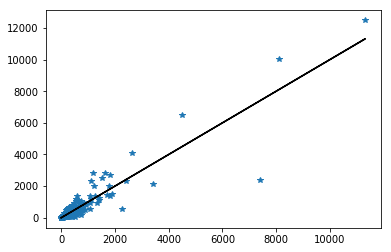

In [77]:
import matplotlib.pyplot as plt
from pylab import polyfit, poly1d
y = Y
x = regr.predict(X)
#x, y = zip(*samples)

fit = polyfit(x, y, 1)
fit_fn = poly1d(fit)
plt.plot(x,y, '*', x, fit_fn(x), 'k')

plt.show()